<a href="https://colab.research.google.com/github/Sarik123-long/Data-Analytics-with_Oasis_Infobyte/blob/main/Project_2_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Read the uploaded file into a pandas DataFrame
  try:
    df = pd.read_csv(fn)
    print("\nDataFrame created successfully:")
    display(df.head())
  except Exception as e:
    print(f"Error reading file: {e}")

Saving store.csv to store.csv
User uploaded file "store.csv" with length 260905 bytes

DataFrame created successfully:


,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


In [2]:
display(df.head())
display(df.tail())
print(df.shape)
print(df.info())
print(df.isnull().sum())

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


,reps,product,qty,revenue,region
9995,Sumedh,Jet,12,233.42,West
9996,Mala,Almond,2,48.50,West
9997,Santosh,Almond,1,25.00,West
9998,Ananya,Trident,2,59.40,North
9999,Sumedh,Milka,1,22.61,West


(10000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reps     10000 non-null  object 
 1   product  10000 non-null  object 
 2   qty      10000 non-null  int64  
 3   revenue  10000 non-null  float64
 4   region   10000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB
None
reps       0
product    0
qty        0
revenue    0
region     0
dtype: int64


In [3]:
reps_summary = df.groupby('reps').agg(
    total_revenue=('revenue', 'sum'),
    total_quantity=('qty', 'sum'),
    number_of_transactions=('reps', 'count')
).reset_index()

reps_summary['average_revenue_per_transaction'] = reps_summary['total_revenue'] / reps_summary['number_of_transactions']
reps_summary['average_quantity_per_transaction'] = reps_summary['total_quantity'] / reps_summary['number_of_transactions']

reps_summary = reps_summary.sort_values(by='total_revenue', ascending=False)

display(reps_summary.head())

,reps,total_revenue,total_quantity,number_of_transactions,average_revenue_per_transaction,average_quantity_per_transaction
56,Seet,35747.41,1350,353,101.267450,3.824363
0,Aash,29998.47,1135,315,95.233238,3.603175
53,Santosh,29801.71,1060,318,93.716069,3.333333
41,Rachna,28263.75,1114,318,88.879717,3.503145
58,Shaanth,27692.49,1057,283,97.853322,3.734982


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant columns for clustering
features = ['total_revenue', 'number_of_transactions', 'average_revenue_per_transaction']
X = reps_summary[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (k). Using k=4 for this example.
k = 4

# Instantiate and fit KMeans model
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for newer sklearn versions
reps_summary['cluster_label'] = kmeans.fit_predict(X_scaled)

# Display the first few rows with cluster labels
display(reps_summary.head())

,reps,total_revenue,total_quantity,number_of_transactions,average_revenue_per_transaction,average_quantity_per_transaction,cluster_label
56,Seet,35747.41,1350,353,101.267450,3.824363,2
0,Aash,29998.47,1135,315,95.233238,3.603175,2
53,Santosh,29801.71,1060,318,93.716069,3.333333,2
41,Rachna,28263.75,1114,318,88.879717,3.503145,2
58,Shaanth,27692.49,1057,283,97.853322,3.734982,2


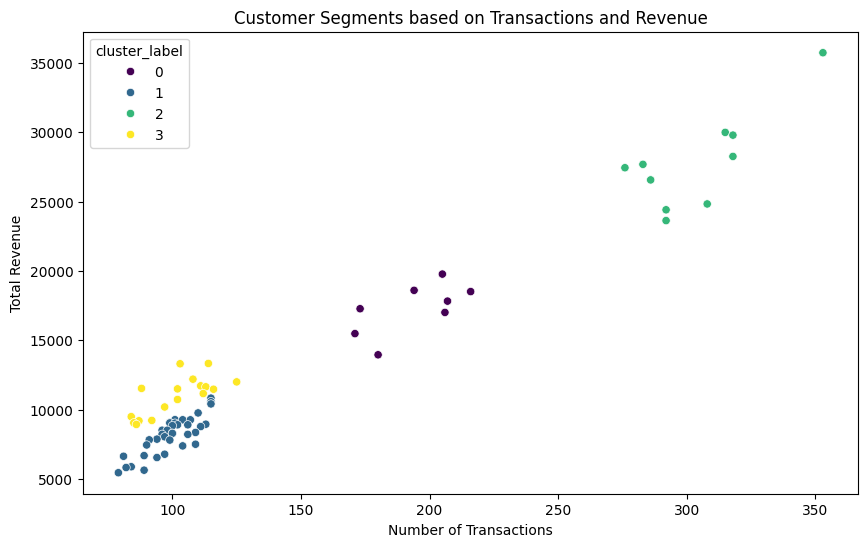

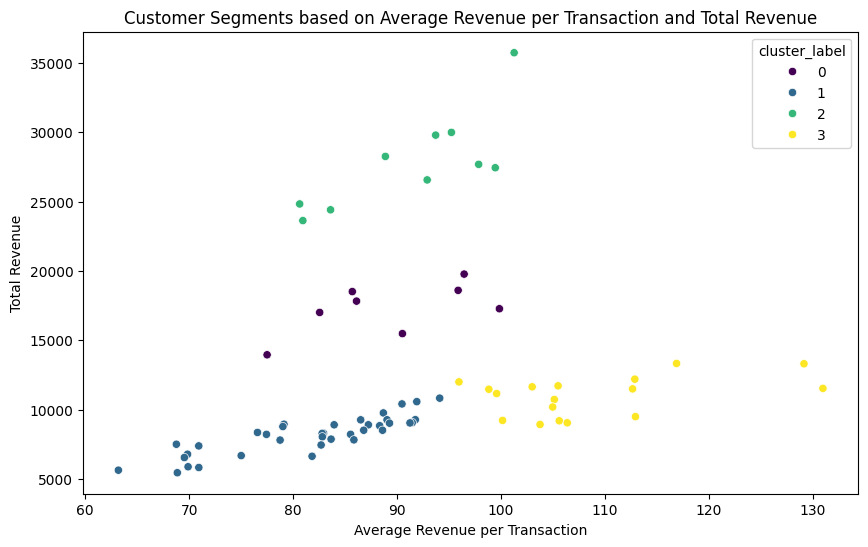

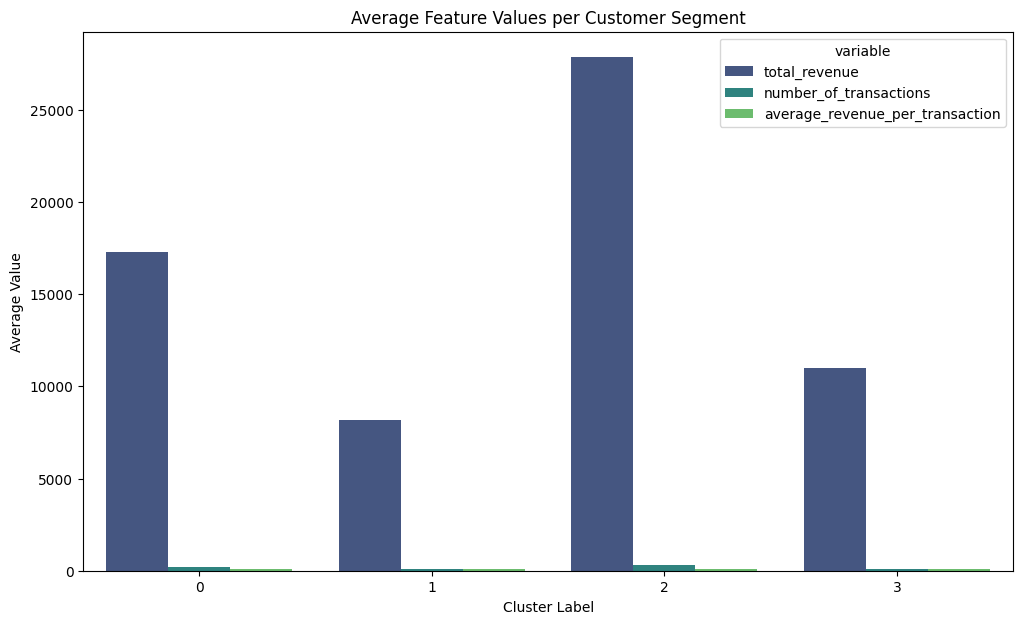

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot 1: Transactions vs. Total Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reps_summary, x='number_of_transactions', y='total_revenue', hue='cluster_label', palette='viridis')
plt.title('Customer Segments based on Transactions and Revenue')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Revenue')
plt.show()

# Scatter plot 2: Average Revenue per Transaction vs. Total Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reps_summary, x='average_revenue_per_transaction', y='total_revenue', hue='cluster_label', palette='viridis')
plt.title('Customer Segments based on Average Revenue per Transaction and Total Revenue')
plt.xlabel('Average Revenue per Transaction')
plt.ylabel('Total Revenue')
plt.show()

# Bar plot: Average feature values per cluster
cluster_means = reps_summary.groupby('cluster_label')[['total_revenue', 'number_of_transactions', 'average_revenue_per_transaction']].mean().reset_index()
cluster_means_melted = cluster_means.melt(id_vars='cluster_label', var_name='variable', value_name='value')

plt.figure(figsize=(12, 7))
sns.barplot(data=cluster_means_melted, x='cluster_label', y='value', hue='variable', palette='viridis')
plt.title('Average Feature Values per Customer Segment')
plt.xlabel('Cluster Label')
plt.ylabel('Average Value')
plt.show()

In [6]:
# Examine the cluster_means DataFrame
display(cluster_means)

# Interpret the characteristics of each cluster
print("\nCluster Characteristics:")
for index, row in cluster_means.iterrows():
    cluster_label = int(row['cluster_label'])
    total_revenue = row['total_revenue']
    num_transactions = row['number_of_transactions']
    avg_revenue_per_transaction = row['average_revenue_per_transaction']

    print(f"\nCluster {cluster_label}:")
    print(f"  Average Total Revenue: ${total_revenue:.2f}")
    print(f"  Average Number of Transactions: {num_transactions:.2f}")
    print(f"  Average Revenue per Transaction: ${avg_revenue_per_transaction:.2f}")

    # Provide insights and recommendations
    if cluster_label == 0:
        print("  Characteristics: Moderate revenue, moderate transactions, moderate average purchase value.")
        print("  Insights: This is a mid-tier segment. They contribute a significant portion of revenue and transactions.")
        print("  Recommendations: Focus on loyalty programs to increase retention and encourage slightly higher transaction values. Cross-selling related products could be effective.")
    elif cluster_label == 1:
        print("  Characteristics: Low revenue, low transactions, low average purchase value.")
        print("  Insights: This is a lower-value segment with less engagement.")
        print("  Recommendations: Implement strategies to increase transaction frequency or average purchase value. Consider targeted promotions or discounts to stimulate activity. Identify reasons for low engagement.")
    elif cluster_label == 2:
        print("  Characteristics: High revenue, high transactions, moderate average purchase value.")
        print("  Insights: This is the high-value segment with high engagement and significant contribution to total revenue.")
        print("  Recommendations: Prioritize retention efforts for this segment. Offer exclusive deals, early access to new products, or premium support. Encourage even higher average purchase values where possible.")
    elif cluster_label == 3:
        print("  Characteristics: Moderate revenue, moderate transactions, high average purchase value.")
        print("  Insights: This segment has high average purchase values despite moderate overall activity. They are likely purchasing higher-priced items.")
        print("  Recommendations: Focus on promoting premium or higher-margin products to this segment. Personalize offers based on their past high-value purchases. Explore opportunities to increase their transaction frequency.")

,cluster_label,total_revenue,number_of_transactions,average_revenue_per_transaction
0,0,17302.252500,194.000000,89.320468
1,1,8170.792703,99.513514,81.766089
2,2,27840.382000,304.100000,91.447895
3,3,10974.178824,101.470588,108.493979



Cluster Characteristics:

Cluster 0:
  Average Total Revenue: $17302.25
  Average Number of Transactions: 194.00
  Average Revenue per Transaction: $89.32
  Characteristics: Moderate revenue, moderate transactions, moderate average purchase value.
  Insights: This is a mid-tier segment. They contribute a significant portion of revenue and transactions.
  Recommendations: Focus on loyalty programs to increase retention and encourage slightly higher transaction values. Cross-selling related products could be effective.

Cluster 1:
  Average Total Revenue: $8170.79
  Average Number of Transactions: 99.51
  Average Revenue per Transaction: $81.77
  Characteristics: Low revenue, low transactions, low average purchase value.
  Insights: This is a lower-value segment with less engagement.
  Recommendations: Implement strategies to increase transaction frequency or average purchase value. Consider targeted promotions or discounts to stimulate activity. Identify reasons for low engagement.

Cl